Importing libraries and loading data

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
from sklearn.decomposition import PCA
from abc import abstractmethod, ABC

df_water = pd.read_csv('../datasets/water-quality.csv' , sep=',')

Output the head of file for verification

In [2]:
df_water.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
3,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
4,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
5,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
6,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1
7,1.35,21.96,0.04,0.84,0.002,0.10,0.76,0.17,0.58,0.52,...,0.011,18.40,1.49,0.009,21.52,1.30,0.08,0.48,0.08,1
8,1.88,19.26,0.02,2.78,0.008,0.05,0.42,1.00,0.09,0.91,...,0.103,4.37,1.95,0.006,22.12,1.97,0.03,0.06,0.05,1
9,4.93,23.98,0.04,3.05,0.008,0.70,0.51,1.35,1.07,0.70,...,0.101,1.16,1.11,0.008,26.80,5.58,0.09,0.38,0.03,1


Display dataset information

In [3]:
print('-' * 30)
print('Water Dataset Information :')
print('-' * 30)
print('Total Rows:', df_water.shape[0])
print('Total Columns:', df_water.shape[1])
print('-' * 30)
df_water.info(memory_usage=False, show_counts=False)

------------------------------
Water Dataset Information :
------------------------------
Total Rows: 1912
Total Columns: 21
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   aluminium    float64
 1   ammonia      float64
 2   arsenic      float64
 3   barium       float64
 4   cadmium      float64
 5   chloramine   float64
 6   chromium     float64
 7   copper       float64
 8   flouride     float64
 9   bacteria     float64
 10  viruses      float64
 11  lead         float64
 12  nitrates     float64
 13  nitrites     float64
 14  mercury      float64
 15  perchlorate  float64
 16  radium       float64
 17  selenium     float64
 18  silver       float64
 19  uranium      float64
 20  is_safe      int64  
dtypes: float64(20), int64(1)

Finding the number of distinct values ​​in each column

In [4]:
print('-' * 30)
print('Number of distinct values :')
print('-' * 30)
for col in df_water:
    print(f"{col:20}\t{df_water[col].value_counts().count()}")

------------------------------
Number of distinct values :
------------------------------
aluminium           	490
ammonia             	1354
arsenic             	107
barium              	445
cadmium             	23
chloramine          	729
chromium            	91
copper              	201
flouride            	151
bacteria            	101
viruses             	61
lead                	200
nitrates            	1156
nitrites            	220
mercury             	11
perchlorate         	1610
radium              	604
selenium            	11
silver              	51
uranium             	10
is_safe             	2


Finding the range of numbers in each column

In [5]:
print('-' * 30)
print('Range of numbers in each column :')
print('-' * 30)
print("".ljust(20), "Minimum".ljust(10), "Maximum".ljust(10))
for i in df_water.columns:
    print(i.ljust(20), str(df_water[i].min()).ljust(10), str(df_water[i].max()).ljust(10))

------------------------------
Range of numbers in each column :
------------------------------
                     Minimum    Maximum   
aluminium            0.0        5.05      
ammonia              -0.07      29.84     
arsenic              0.0        1.05      
barium               0.0        4.9       
cadmium              0.0        0.13      
chloramine           0.0        8.66      
chromium             0.0        0.9       
copper               0.0        2.0       
flouride             0.0        1.5       
bacteria             0.0        1.0       
viruses              0.0        1.0       
lead                 0.0        0.2       
nitrates             0.0        19.81     
nitrites             0.0        2.89      
mercury              0.0        0.01      
perchlorate          0.0        59.89     
radium               0.0        7.99      
selenium             0.0        0.1       
silver               0.0        0.5       
uranium              0.0        0.09      
i

Standard Deviation output

In [6]:
std_deviation_values = df_water.std()

print('-' * 30)
print('Standard Deviation for each column:')
print('-' * 30)
print(std_deviation_values)

------------------------------
Standard Deviation for each column:
------------------------------
aluminium       1.538874
ammonia         8.679384
arsenic         0.296409
barium          1.215219
cadmium         0.038420
chloramine      2.378059
chromium        0.269774
copper          0.607053
flouride        0.432856
bacteria        0.311839
viruses         0.355768
lead            0.056743
nitrates        5.591826
nitrites        0.407027
mercury         0.002994
perchlorate    17.099534
radium          2.297400
selenium        0.028623
silver          0.149665
uranium         0.026930
is_safe         0.499601
dtype: float64


Variance output

In [7]:
variance_values = df_water.var()

print('-' * 30)
print('Variance for each column:')
print('-' * 30)
print(variance_values)

------------------------------
Variance for each column:
------------------------------
aluminium        2.368133
ammonia         75.331701
arsenic          0.087859
barium           1.476756
cadmium          0.001476
chloramine       5.655166
chromium         0.072778
copper           0.368514
flouride         0.187365
bacteria         0.097243
viruses          0.126571
lead             0.003220
nitrates        31.268522
nitrites         0.165671
mercury          0.000009
perchlorate    292.394053
radium           5.278047
selenium         0.000819
silver           0.022400
uranium          0.000725
is_safe          0.249601
dtype: float64


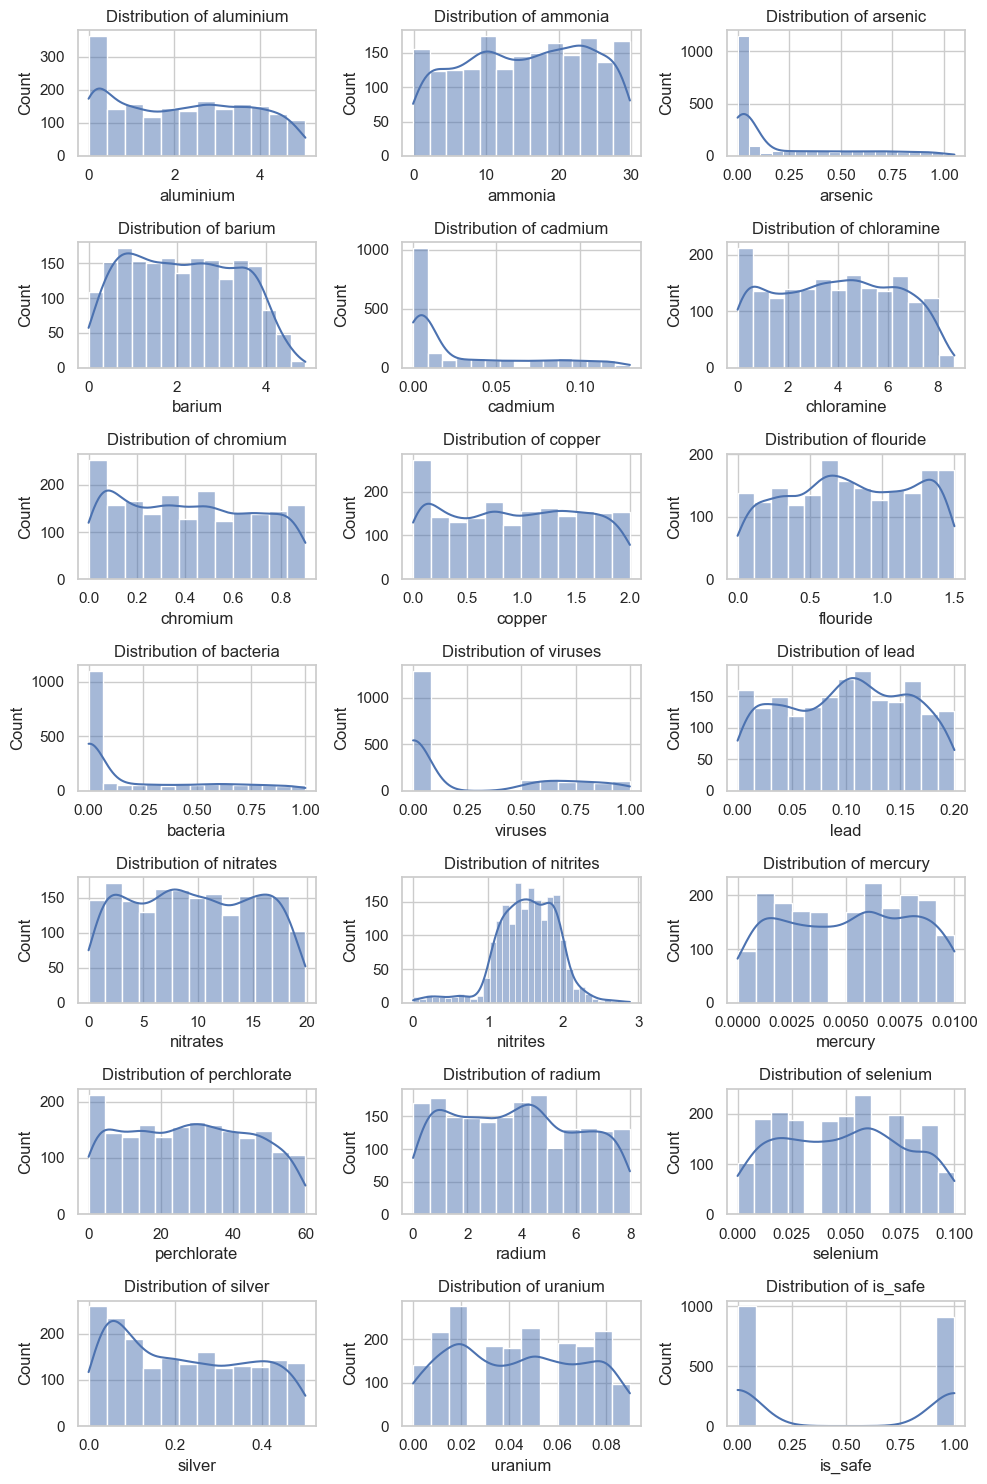

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(10, 15))
axes = axes.flatten()

for i, col in enumerate(df_water.columns):
    sns.histplot(data=df_water, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Distribution for each numerical variable for safe and unsafe water separately

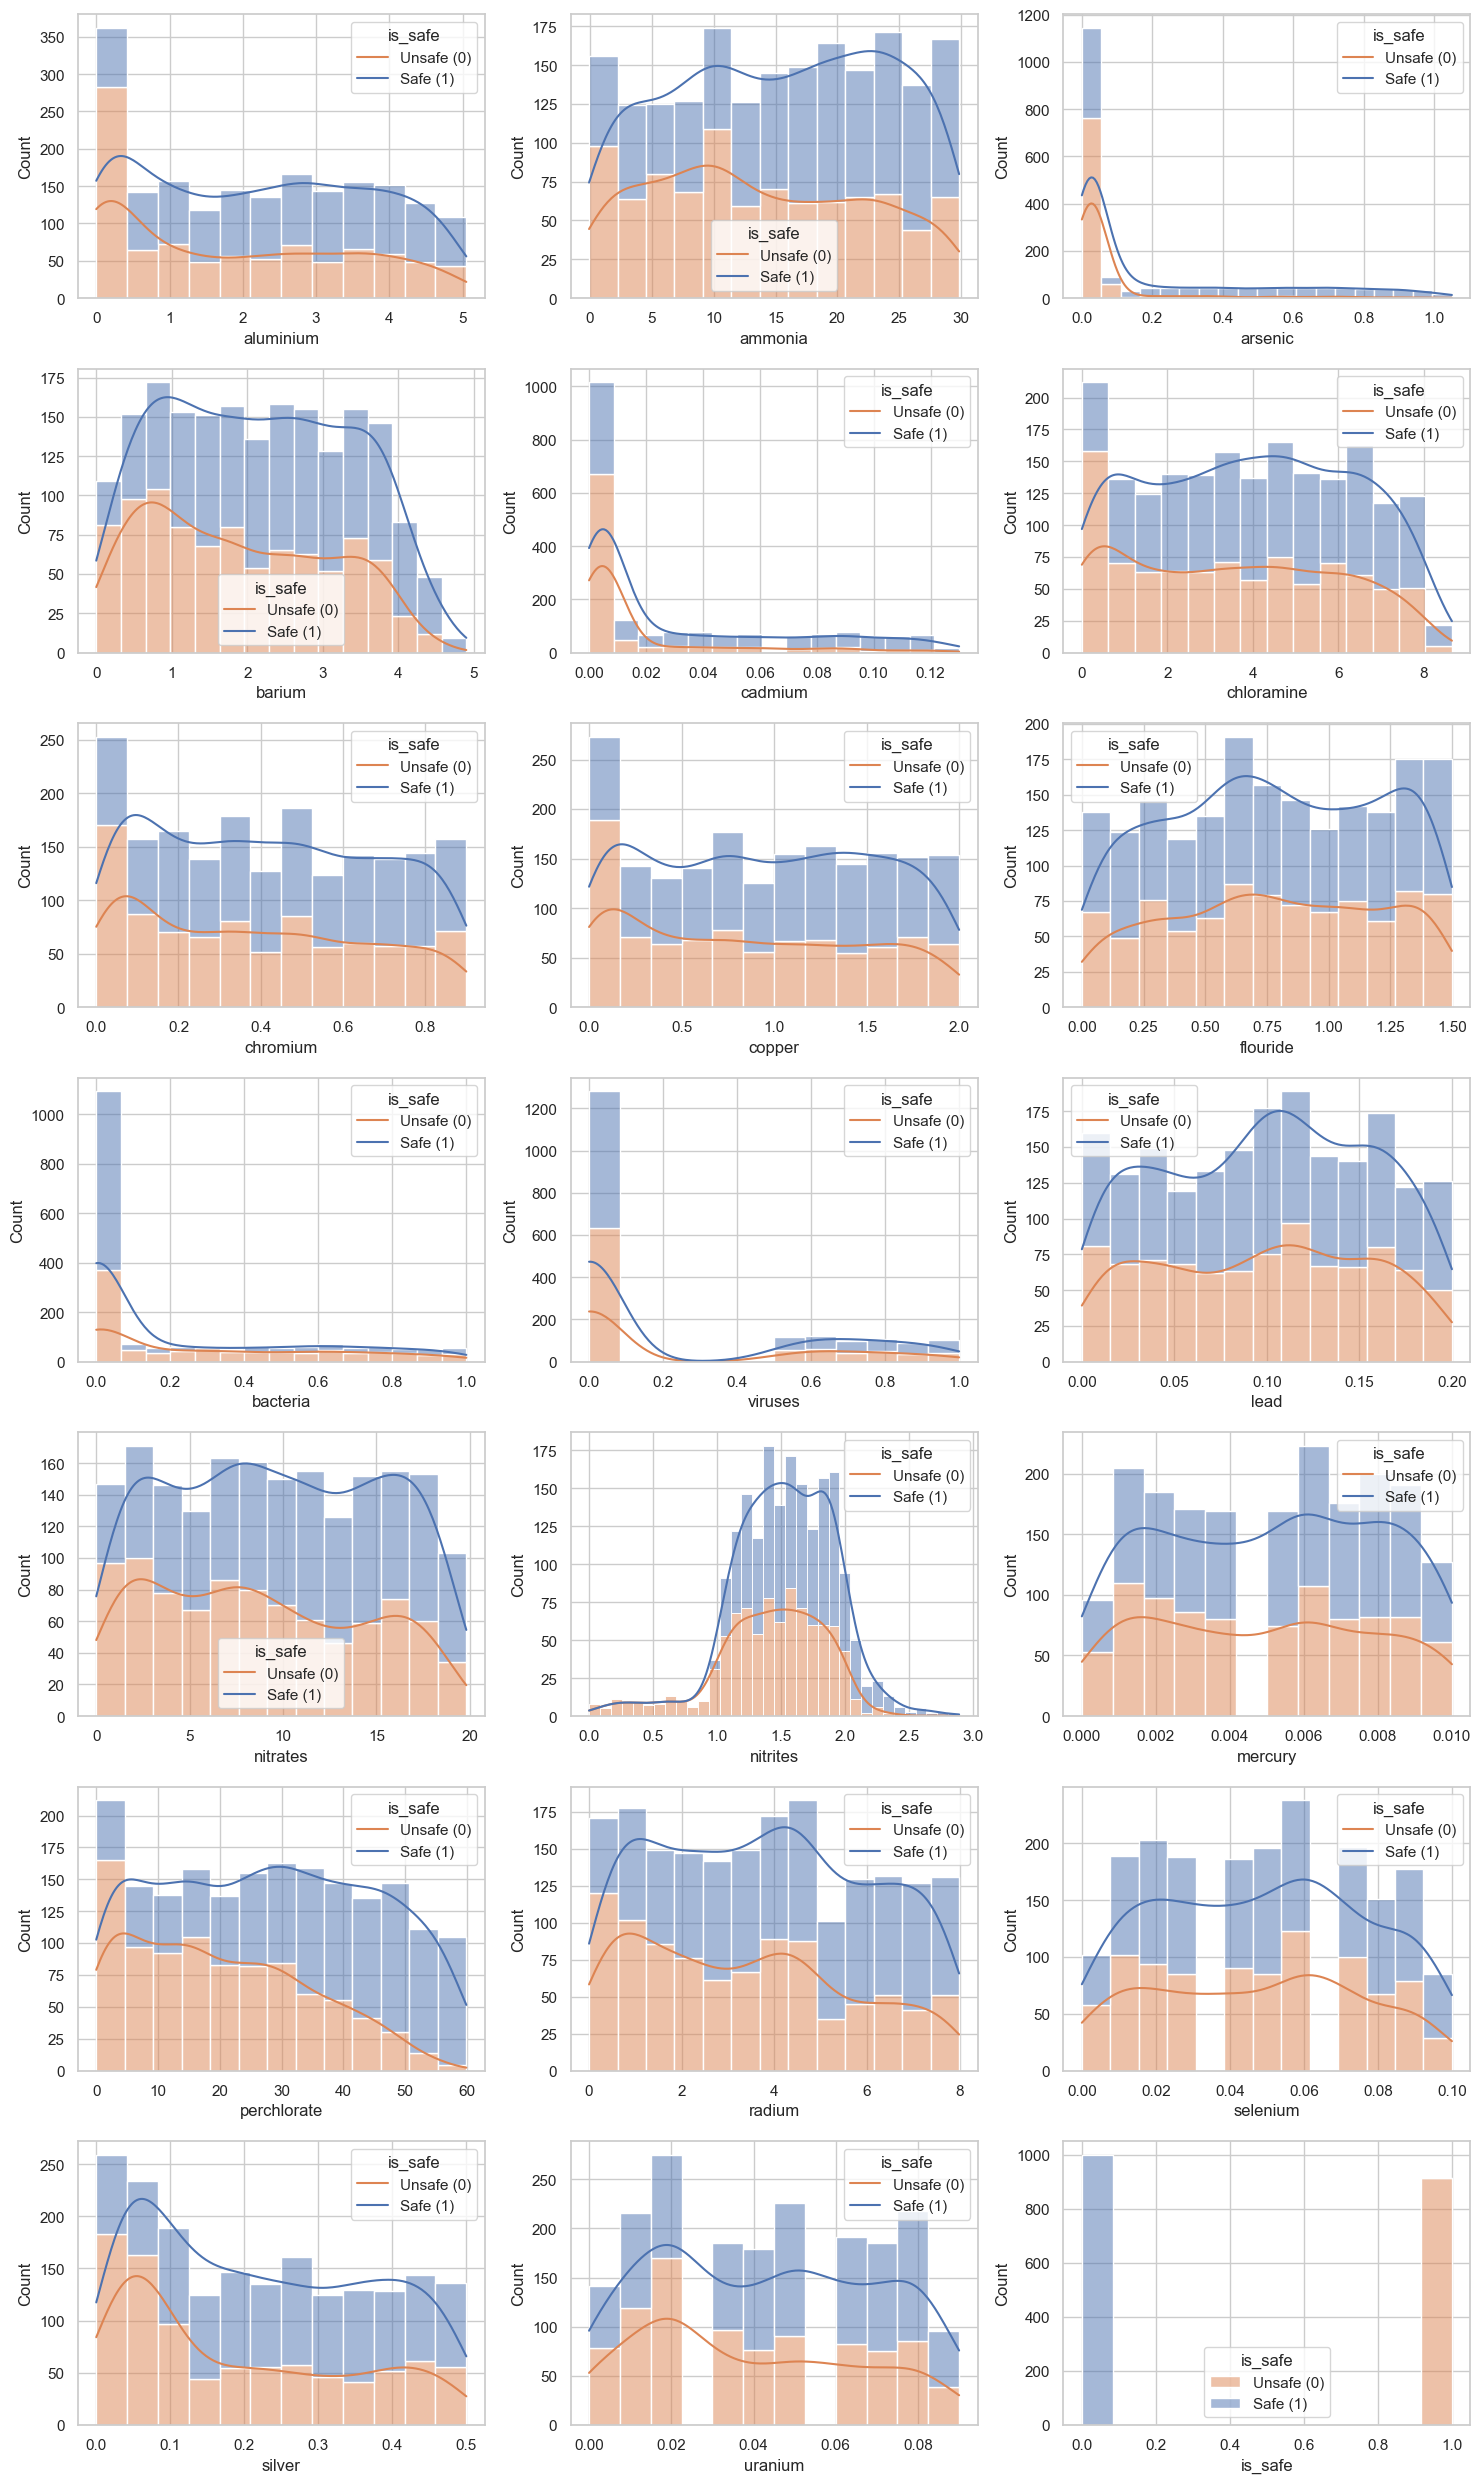

In [17]:
num_rows = 7
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))
axes = axes.flatten()

sns.set(style="whitegrid")

for i, column in enumerate(df_water.columns):
    if i >= num_rows * num_cols:
        break

    ax = axes[i]
    
    sns.histplot(data=df_water, x=column, hue="is_safe", multiple="stack", kde=True, ax=ax)
    
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    
    ax.legend(title="is_safe", labels=['Unsafe (0)', 'Safe (1)'])

for i in range(num_rows * num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Output a matrix of missing values

------------------------------
Matrix of missing values :
------------------------------


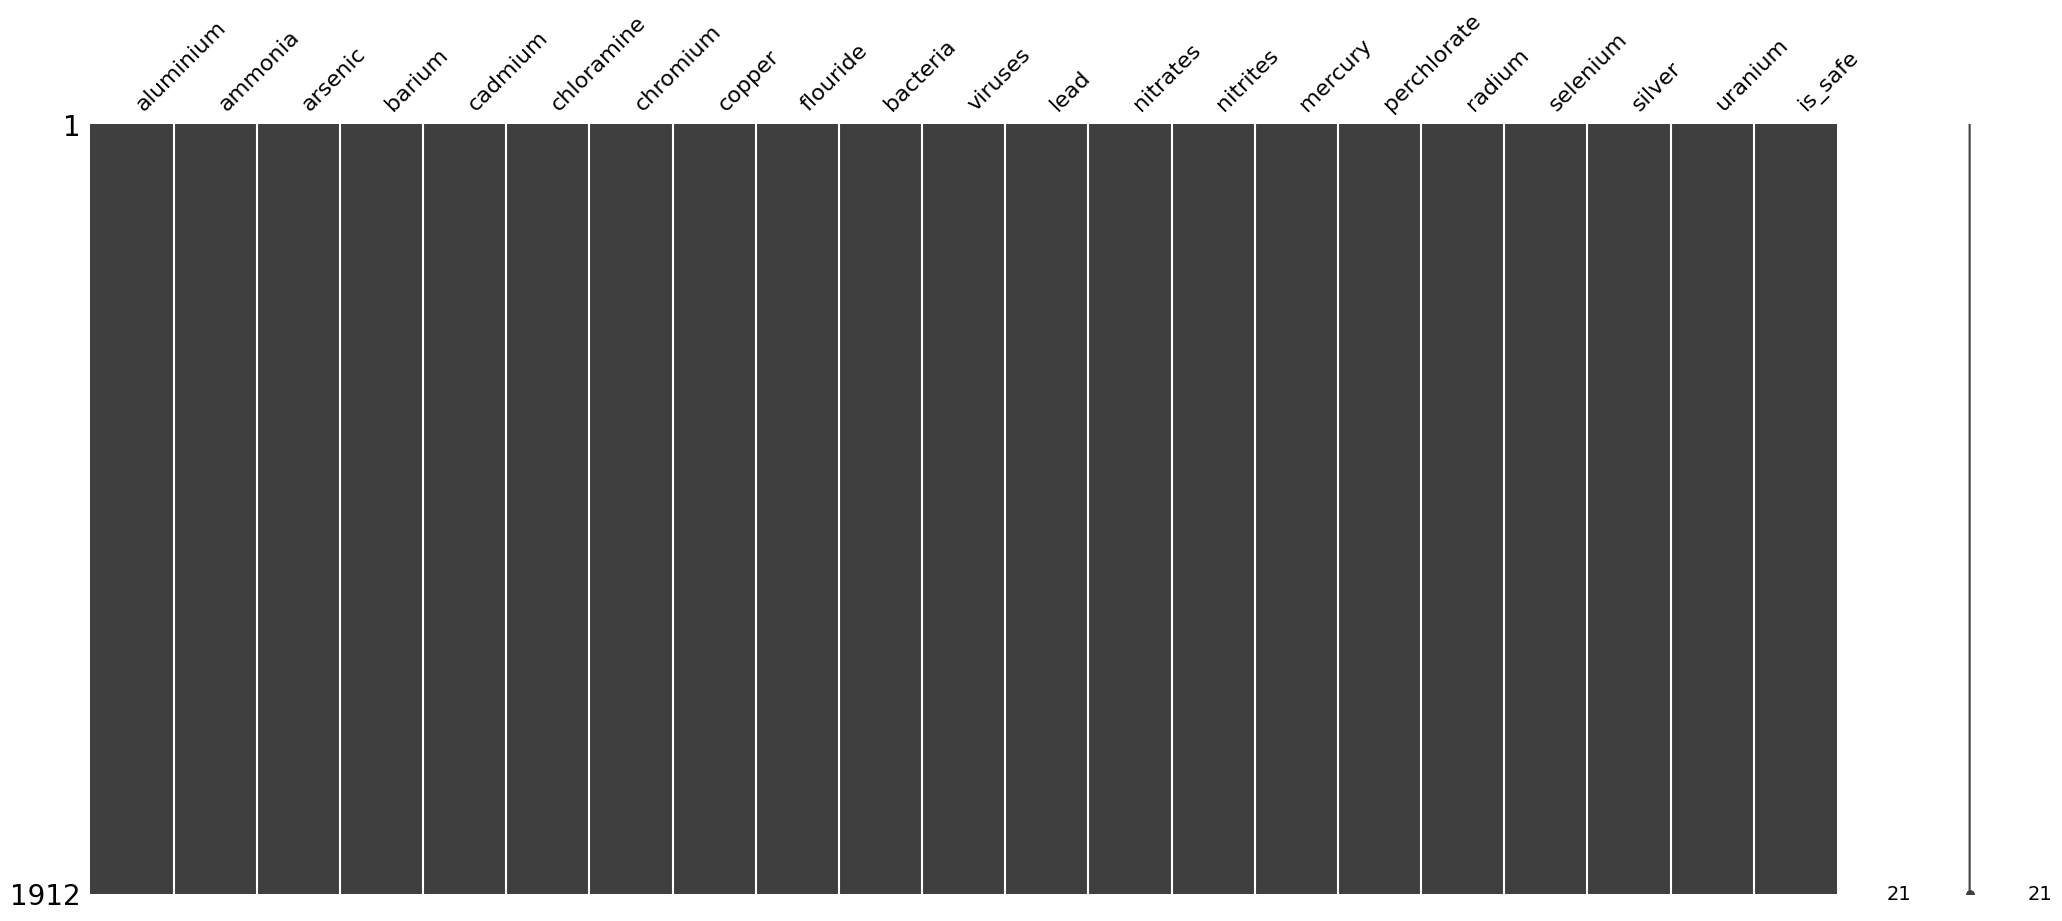

In [9]:
print('-' * 30)
print('Matrix of missing values :')
print('-' * 30)
mso.matrix(df_water)
plt.show()

Checking for missing values

In [53]:
df_water.isna().sum(axis=0)

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

Output box plot

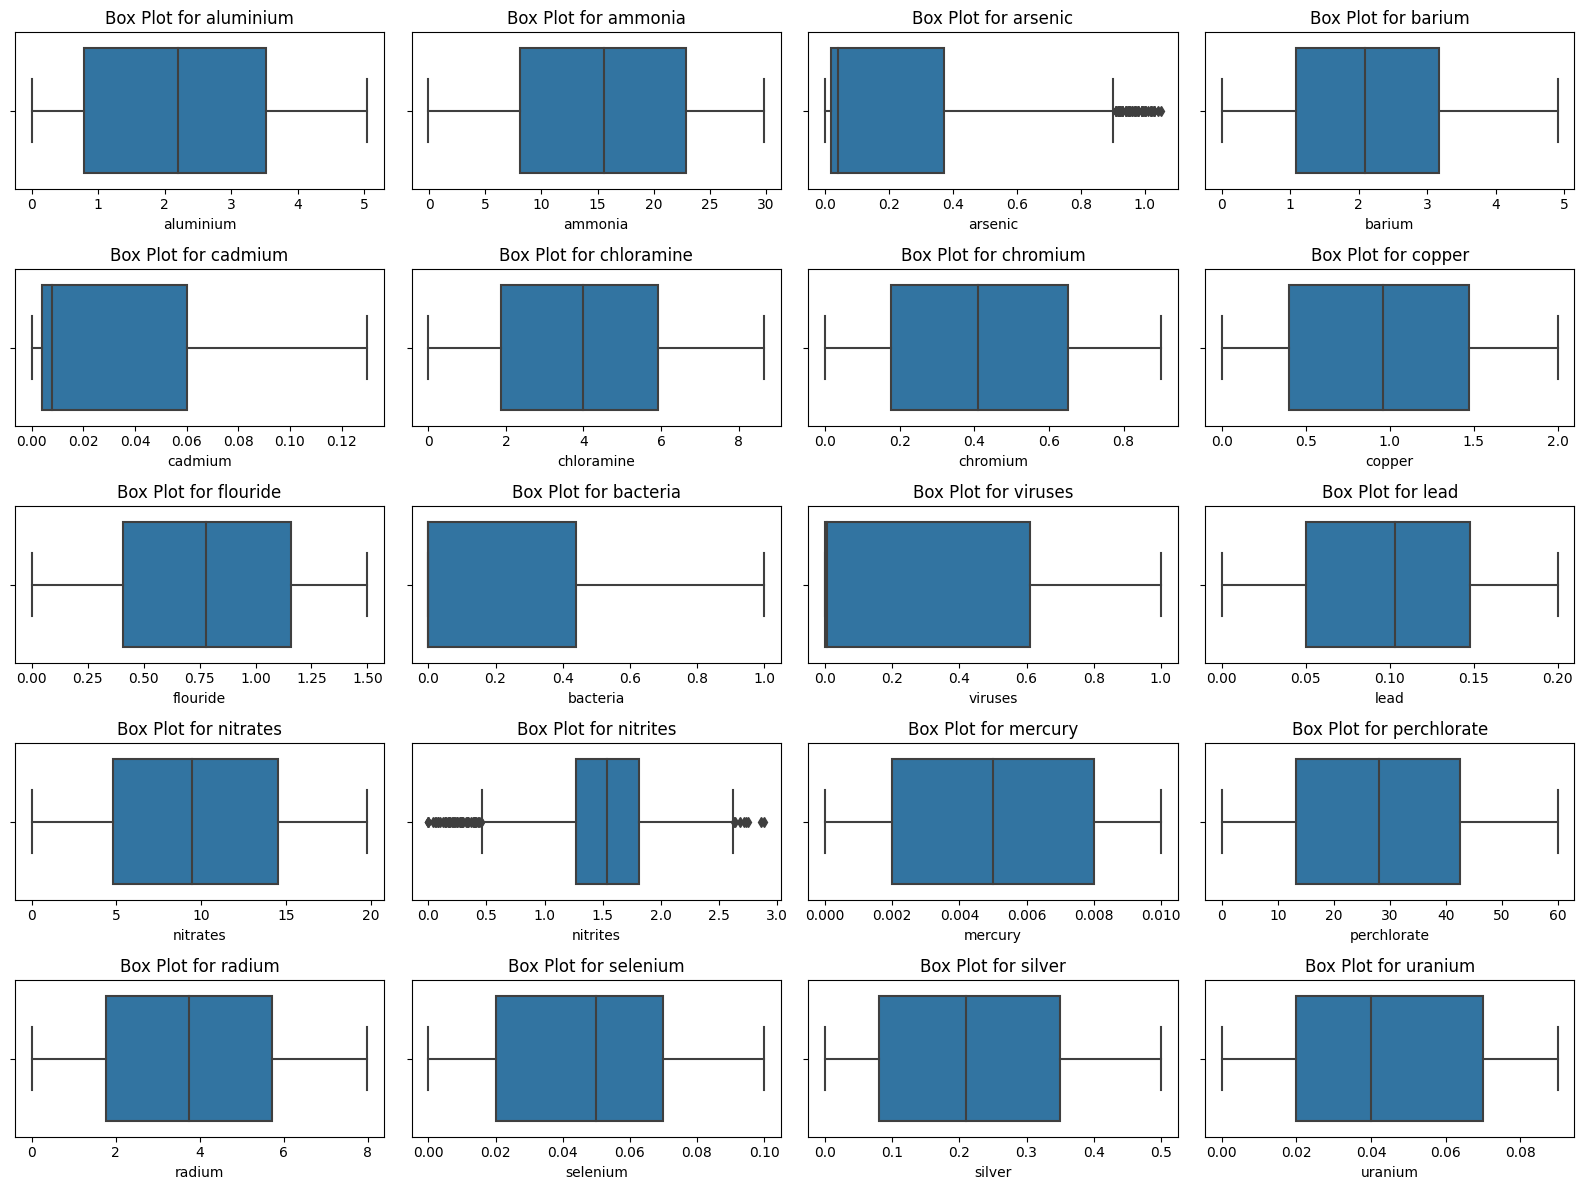

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 12))

column_names = df_water.columns

for i, ax in enumerate(axes.ravel()):
    if i < len(column_names):
        sns.boxplot(data=df_water, x=column_names[i], ax=ax)
        ax.set_title(f'Box Plot for {column_names[i]}')

plt.tight_layout()
plt.show()

Outliner visual detection

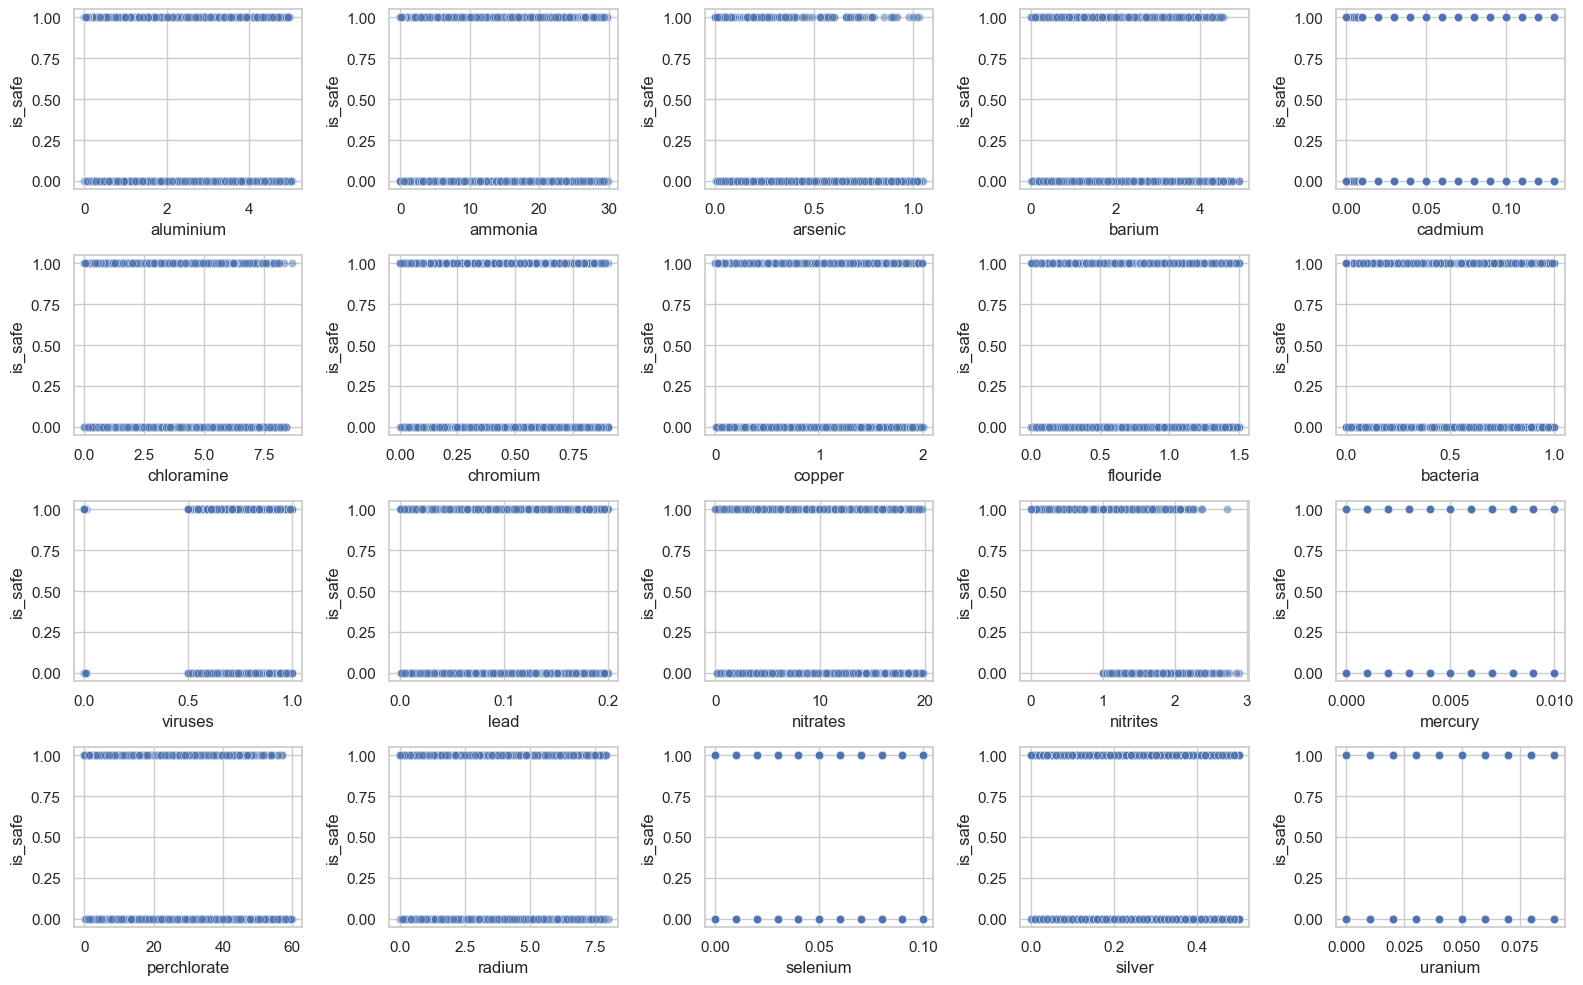

In [16]:
columns_to_check = df_water.columns[:-1]

num_rows = 5
num_cols = 5

num_plots = min(len(columns_to_check), num_rows * num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

axes = axes.flatten()

sns.set(style="whitegrid")

for i in range(num_plots):
    column = columns_to_check[i]
    sns.scatterplot(data=df_water, x=column, y="is_safe", alpha=0.5, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("is_safe")

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Output a correlation matrix

In [20]:
correlation_matrix = df_water.corr()
correlation_matrix

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.030298,0.073177,0.133301,-0.058252,0.118790,0.140046,0.168650,-0.030265,-0.015323,...,0.070095,0.045138,0.221989,0.027054,0.143328,0.172512,0.020469,0.200287,0.120608,-0.224284
ammonia,0.030298,1.000000,-0.015966,0.018032,-0.004521,0.012182,0.083701,0.016929,-0.025970,0.032359,...,-0.035793,0.024158,0.008693,0.041608,0.011785,0.022451,0.041077,-0.004079,0.016240,-0.174100
arsenic,0.073177,-0.015966,1.000000,0.215298,0.616491,0.082304,0.030470,0.001990,0.018425,-0.297806,...,-0.007169,0.079948,0.301446,-0.036664,0.047539,0.033810,0.001342,0.023910,0.013694,-0.461086
barium,0.133301,0.018032,0.215298,1.000000,0.115236,0.082261,0.070791,0.085565,-0.028020,-0.045029,...,0.042347,0.026843,0.232630,0.042640,0.180210,0.069068,0.042581,0.138931,-0.010693,-0.205084
cadmium,-0.058252,-0.004521,0.616491,0.115236,1.000000,-0.016892,-0.043196,-0.069766,0.031846,-0.322686,...,-0.036968,0.021587,0.138502,-0.014143,-0.019491,-0.066637,-0.007408,-0.090063,-0.018292,-0.357217
chloramine,0.118790,0.012182,0.082304,0.082261,-0.016892,1.000000,0.105019,0.159426,0.016827,0.072474,...,0.087569,0.078899,0.264104,-0.034813,0.163831,0.136235,0.011729,0.089451,-0.005154,-0.157934
chromium,0.140046,0.083701,0.030470,0.070791,-0.043196,0.105019,1.000000,0.137636,-0.003797,0.062133,...,0.039476,0.026606,0.183814,-0.018005,0.113166,0.020179,0.056337,0.133470,0.016908,-0.120572
copper,0.168650,0.016929,0.001990,0.085565,-0.069766,0.159426,0.137636,1.000000,0.014561,0.016714,...,0.109169,0.046244,0.157961,0.062748,0.118446,0.099581,0.012110,0.136051,0.040166,-0.145455
flouride,-0.030265,-0.025970,0.018425,-0.028020,0.031846,0.016827,-0.003797,0.014561,1.000000,0.022741,...,0.008030,-0.014134,-0.022424,-0.004118,-0.042247,0.042434,0.015875,0.036555,0.014524,0.008015
bacteria,-0.015323,0.032359,-0.297806,-0.045029,-0.322686,0.072474,0.062133,0.016714,0.022741,1.000000,...,0.033608,0.003692,0.008262,-0.010595,0.059934,0.027902,-0.008381,0.009813,-0.013153,0.232516


Output a heatmap

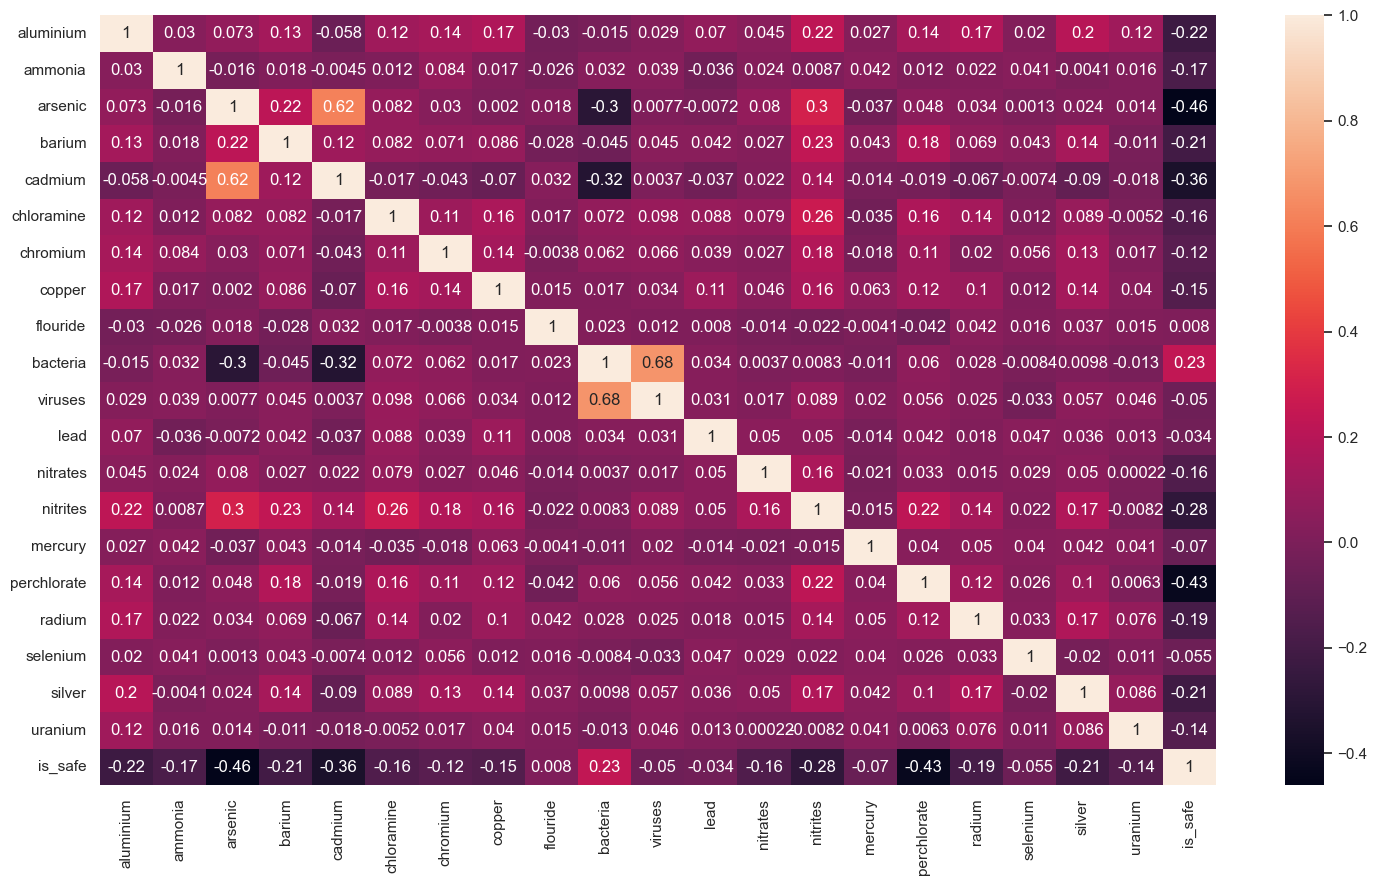

In [24]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_water.corr(), annot=True);

Determining the correlation between the resulting variable "is_safe" and other features in the data

In [21]:
print('-' * 30)
print('Correlation with target :')
print('-' * 30)
correlation_with_target = correlation_matrix['is_safe'].abs()
correlation_with_target = correlation_with_target.drop('is_safe')
correlation_count = (correlation_with_target > 0.15).sum()
print(correlation_with_target)
print(f"Number of columns correlated with 'quality': {correlation_count}")

------------------------------
Correlation with target :
------------------------------
aluminium      0.224284
ammonia        0.174100
arsenic        0.461086
barium         0.205084
cadmium        0.357217
chloramine     0.157934
chromium       0.120572
copper         0.145455
flouride       0.008015
bacteria       0.232516
viruses        0.049760
lead           0.033619
nitrates       0.158483
nitrites       0.276956
mercury        0.070385
perchlorate    0.431983
radium         0.187432
selenium       0.055088
silver         0.210111
uranium        0.140767
Name: is_safe, dtype: float64
Number of columns correlated with 'quality': 12


PCA with derived dimensionality

In [24]:
n_components = correlation_count

X = df_water.drop('is_safe', axis=1)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print('-' * 30)
print("PCA results :")
print('-' * 30)
print(f"{X_pca}")

------------------------------
PCA results :
------------------------------
[[  9.8050792    6.12320299   6.34206073 ...   0.57442437  -0.38119837
   -0.28417448]
 [  4.32001087  -5.63308057  -7.76829706 ...   0.18586852   0.28620958
   -0.35527335]
 [-18.88822236   4.01346596  -7.74729642 ...   0.08579732  -0.3426737
    0.121792  ]
 ...
 [ -8.32579687   6.00308514  -0.05322504 ...  -0.19704983   0.83391836
    0.12836005]
 [  5.65097642  -3.19225468  -1.92545658 ...  -0.18454197   0.20137548
   -0.10132471]
 [ -9.31881451  -5.35720954   7.37699556 ...  -0.31434022   0.04458503
    0.20455548]]


In [30]:
class DataScalar:
    def __init__(self, array=np.array([])):
        if array.size > 0:
            self.set_values(array)

    @abstractmethod
    def _scale(self, array: np.ndarray):
        """
        Scales data
        :param array: array of data
        :return: scaled array
        """
        ...

    @abstractmethod
    def set_values(self, array: np.ndarray):
        ...

    def __call__(self, array: np.ndarray):
        return self._scale(array)
    

Code for Standardizer

In [31]:
class Standardizer(DataScalar):
    def __init__(self, array=np.array([])):
        self._mean_values = 0
        self._std_values = 1
        super().__init__(array)

    def set_values(self, array: np.ndarray):
        self._mean_values = array.mean(axis=0)
        self._std_values = array.std(axis=0)

    def _scale(self, array: np.ndarray):
        return (array - self._mean_values) / self._std_values

Distribution After Standardization

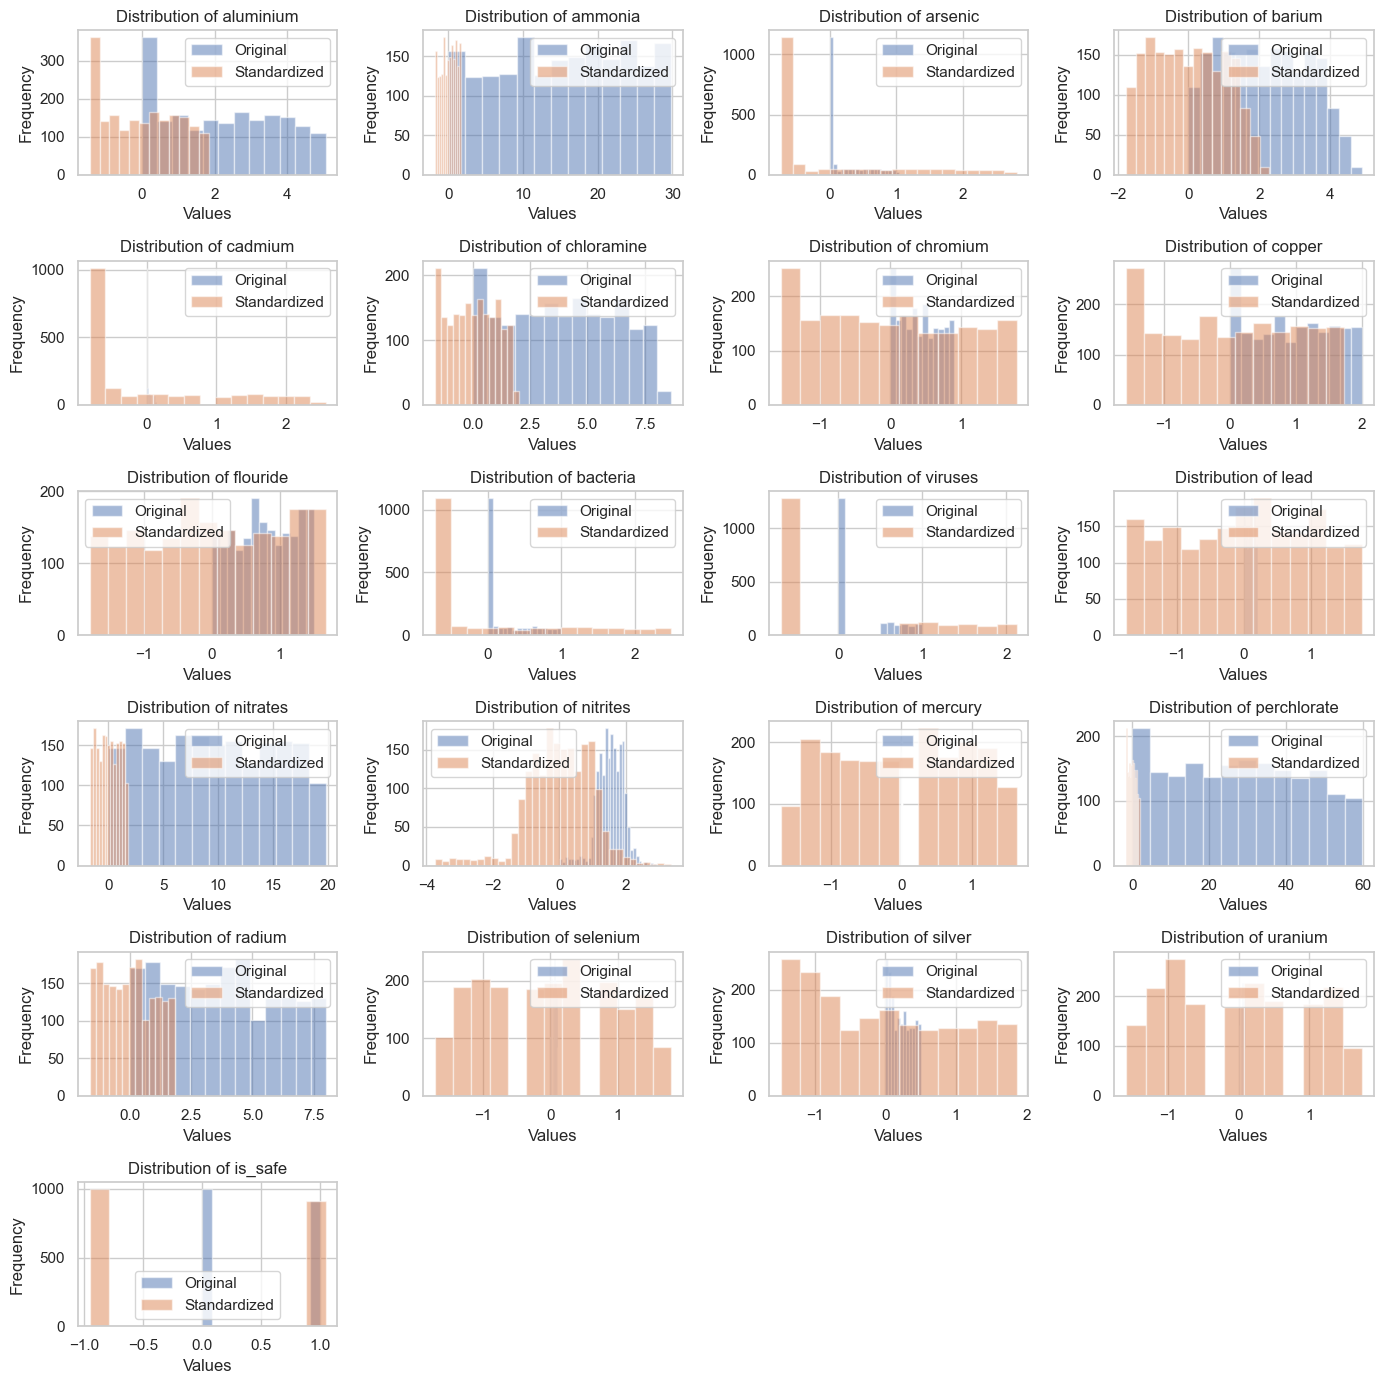

In [41]:
data = np.array(df_water)
scaler = Standardizer(array=data)
scaled_data = scaler._scale(data)

num_rows = 6
num_columns = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(14, 14))

axes = axes.flatten()

for i, column in enumerate(df_water.columns):
    ax = axes[i]
    ax.hist(data[:, i], bins='auto', alpha=0.5, label='Original')
    ax.hist(scaled_data[:, i], bins='auto', alpha=0.5, label='Standardized')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.legend()

for j in range(len(df_water.columns), num_rows * num_columns):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Code for Normalizer

In [42]:
class Normalizer(DataScalar):
    def __init__(self, array=np.array([])):
        self._min_values = 0
        self._max_values = 1
        super().__init__(array)

    def set_values(self, array: np.ndarray):
        self._min_values = array.min(axis=0)
        self._max_values = array.max(axis=0)

    def _scale(self, array: np.ndarray):
        return (array - self._min_values) / (self._max_values - self._min_values)

Distribution After Normalization

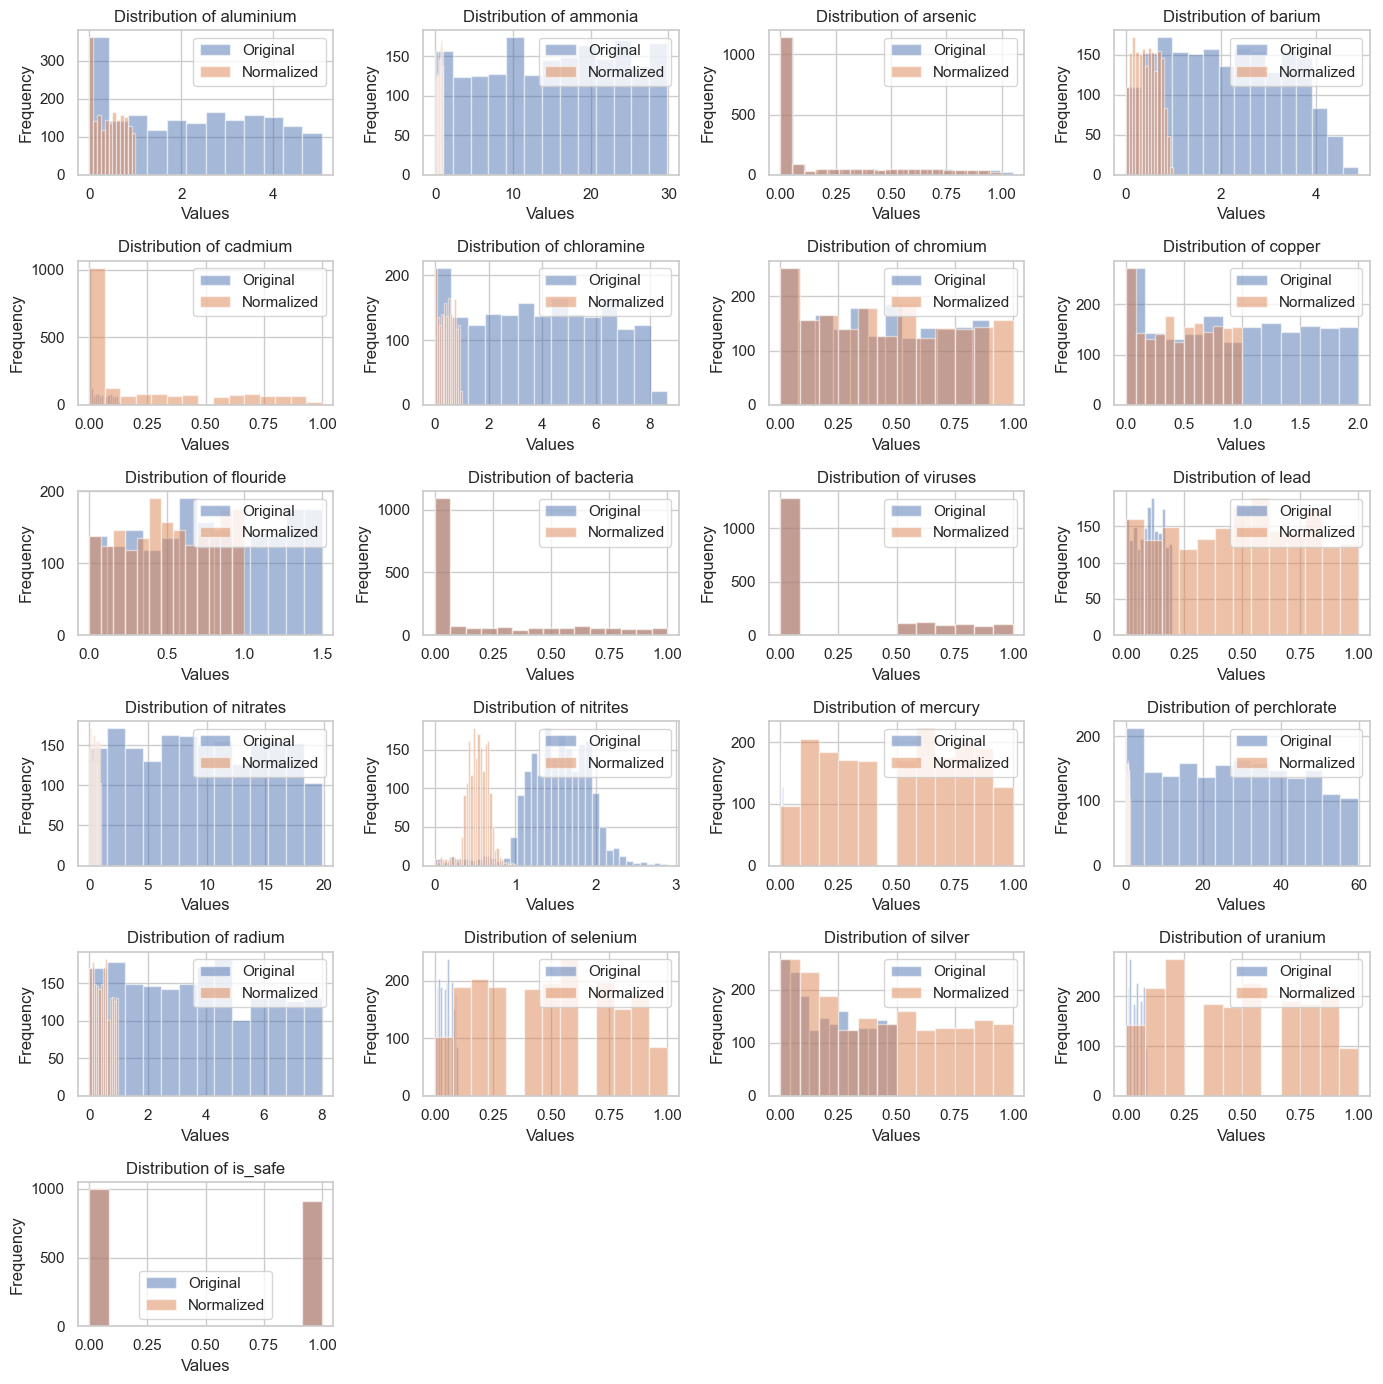

In [45]:
data = np.array(df_water)
scaler = Normalizer(array=data)
scaled_data = scaler._scale(data)

num_rows = 6
num_columns = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(14, 14))

axes = axes.flatten()

for i, column in enumerate(df_water.columns):
    ax = axes[i]
    ax.hist(data[:, i], bins='auto', alpha=0.5, label='Original')
    ax.hist(scaled_data[:, i], bins='auto', alpha=0.5, label='Normalized')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.legend()

for j in range(len(df_water.columns), num_rows * num_columns):
    axes[j].axis('off')

plt.tight_layout()
plt.show()